In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import art3d

In [2]:
g4_df = pd.read_csv("../muon_rtd_2023-06-01_165701/g4_output.txt")
resets_df = pd.read_csv("../muon_rtd_2023-06-01_165701/resets_output.txt")

In [3]:
xi_muon = []
yi_muon = [] 
zi_muon = []

for i in range(100):
    xi_muon.append(g4_df[g4_df.event == i].xi.iloc[0])
    yi_muon.append(g4_df[g4_df.event == i].yi.iloc[0])
    zi_muon.append(g4_df[g4_df.event == i].zi.iloc[0])  

    
int_position = pd.DataFrame()
int_position['xi_muon']=pd.Series(xi_muon)
int_position['yi_muon']=pd.Series(yi_muon)
int_position['zi_muon']=pd.Series(zi_muon)

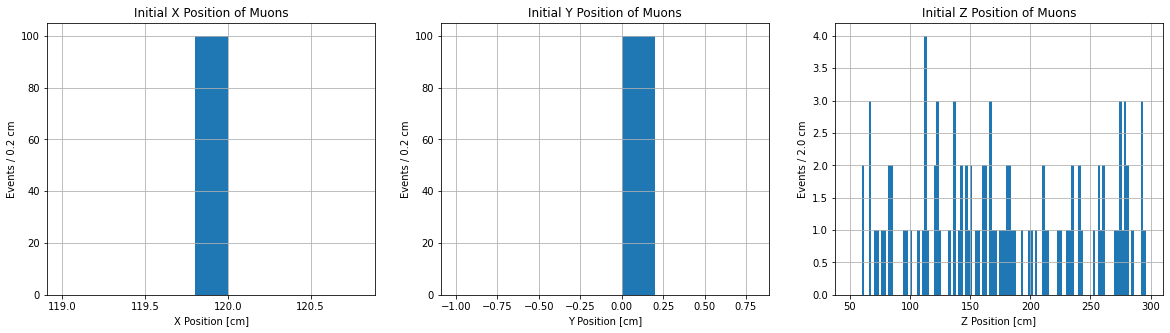

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
int_position["xi_muon"].hist(ax=axes[0], bins=np.arange(119, 121, 0.2))
axes[0].locator_params(axis='x', nbins=6)
axes[0].set_title('Initial X Position of Muons')
axes[0].set_xlabel('X Position [cm]')
axes[0].set_ylabel('Events / 0.2 cm')
int_position["yi_muon"].hist(ax=axes[1], bins=np.arange(-1, 1, 0.2))
axes[1].set_title('Initial Y Position of Muons')
axes[1].set_xlabel('Y Position [cm]')
axes[1].set_ylabel('Events / 0.2 cm')
int_position["zi_muon"].hist(ax=axes[2], bins=np.arange(50, 300, 2))
axes[2].set_title('Initial Z Position of Muons')
axes[2].set_xlabel('Z Position [cm]')
axes[2].set_ylabel('Events / 2.0 cm')
axes[0].plot
axes[1].plot
axes[2].plot
plt.savefig('Muon_Positions.png', dpi=1200)

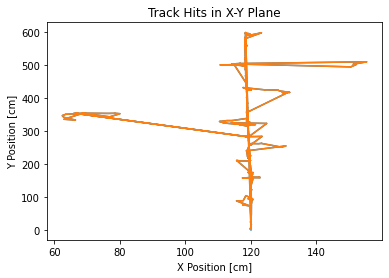

In [36]:
fig = plt.figure()
plt.plot(g4_df[g4_df.event == 0].xi, g4_df[g4_df.event == 0].yi, g4_df[g4_df.event == 0].xf, g4_df[g4_df.event == 0].yf)
plt.title("Track Hits in X-Y Plane")
plt.xlabel("X Position [cm]")
plt.ylabel("Y Position [cm]")
plt.savefig('HitTracks_XY.png', dpi=1200)

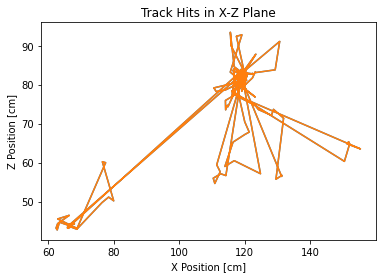

In [37]:
fig = plt.figure()
plt.plot(g4_df[g4_df.event == 0].xi, g4_df[g4_df.event == 0].zi, g4_df[g4_df.event == 0].xf, g4_df[g4_df.event == 0].zf)
plt.title("Track Hits in X-Z Plane")
plt.xlabel("X Position [cm]")
plt.ylabel("Z Position [cm]")
plt.savefig('HitTracks_XZ.png', dpi=1200)

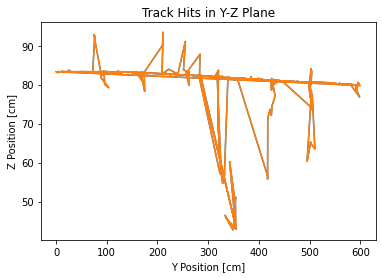

In [38]:
fig = plt.figure()
plt.plot(g4_df[g4_df.event == 0].yi, g4_df[g4_df.event == 0].zi, g4_df[g4_df.event == 0].yf, g4_df[g4_df.event == 0].zf)
plt.title("Track Hits in Y-Z Plane")
plt.xlabel("Y Position [cm]")
plt.ylabel("Z Position [cm]")
plt.savefig('HitTracks_YZ.png', dpi=1200)

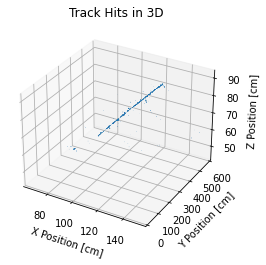

In [40]:
def draw_3d_lines(xi, yi, zi, xf, yf, zf):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(xi)):
        line = art3d.Line3D([xi[i], xf[i]], [yi[i], yf[i]], [zi[i], zf[i]], ls='-', lw='0.2')
        ax.add_line(line)
    
    plt.title("Track Hits in 3D")
    ax.set_xlabel("X Position [cm]")
    ax.set_ylabel("Y Position [cm]")
    ax.set_zlabel("Z Position [cm]")
    ax.set_xlim3d([np.min(xi), np.max(xf)])
    ax.set_ylim3d([np.min(yi), np.max(yf)])
    ax.set_zlim3d([np.min(zi), np.max(zf)])
    ax.plot

draw_3d_lines(xi_0, yi_0, zi_0, xf_0, yf_0, zf_0)
plt.savefig('HitTracks_3D.png', dpi=1200)

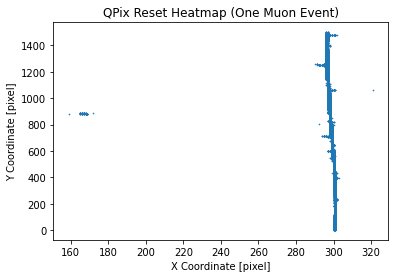

In [40]:
fig = plt.figure()
plt.scatter(resets_df[resets_df.event == 0].pixel_x, resets_df[resets_df.event == 0].pixel_y, 0.4, cmap='coolwarm')
plt.title("QPix Reset Heatmap (One Muon Event)")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap_OnePix.png', dpi=1200)

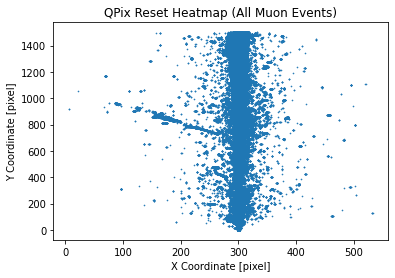

In [41]:
fig = plt.figure()
plt.scatter(resets_df.pixel_x, resets_df.pixel_y, 0.4, cmap='coolwarm')
plt.title("QPix Reset Heatmap (All Muon Events)")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap_AllPix.png', dpi=1200)

In [16]:
def rms(array):
    return np.sqrt(np.sum((array - np.mean(array))**2) / len(array))

resets_df_micro = resets_df.copy()
resets_df_micro['reset_time'] = resets_df_micro.reset_time.mul(1e+6)

resetarr = []
meanarr = []
rmsarr = []
pix_x = []
pix_y = []

for i in range(len(resets_df_micro[resets_df_micro.event == 0].reset_time)):
    if (resets_df_micro[resets_df_micro.event == 0].pixel_x.iloc[i] in pix_x) and (resets_df_micro[resets_df_micro.event == 0].pixel_y.iloc[i] in pix_y):
        pass
    else:
        pix_x.append(resets_df_micro[resets_df_micro.event == 0].pixel_x.iloc[i])
        pix_y.append(resets_df_micro[resets_df_micro.event == 0].pixel_y.iloc[i])

for m in range(len(pix_x)):
    resetarr_subset = resets_df_micro[(resets_df_micro.event == 0) & (resets_df_micro.pixel_x == pix_x[m]) & (resets_df_micro.pixel_y == pix_y[m])].reset_time.to_numpy()
    resetarr.append(resetarr_subset)
    if len(resetarr_subset) > 2:
        mean_value = np.mean(resetarr_subset)  # Calculate the mean of the current subset
        rms_value = rms(resetarr_subset)  # Calculate the RMS of the current subset
        meanarr.append(mean_value)
        rmsarr.append(rms_value)

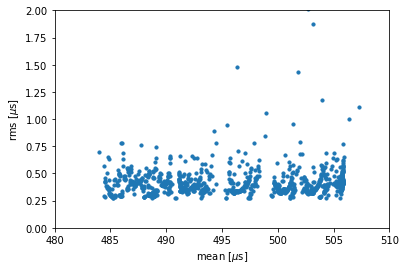

In [42]:
fig = plt.figure()
plt.scatter(meanarr, rmsarr, s=10)
plt.xlim([480, 510])
plt.ylim([0,2])
plt.ylabel("rms [$\mu$s]")
plt.xlabel("mean [$\mu$s]")
plt.savefig('MeanReset_vs_RMS.png', dpi=1200)